In [ ]:
import numpy as np
import pandas as pd

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots


# Special Visualization
import wordcloud, missingno
from wordcloud import WordCloud # wordcloud
# check missing value
import missingno as msno
import networkx as nx

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/csv files/bestsellers with categories.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [ ]:
df.shape

(549, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         549 non-null    object 
 1   Author       549 non-null    object 
 2   User Rating  549 non-null    float64
 3   Reviews      549 non-null    int64  
 4   Price        549 non-null    int64  
 5   Year         549 non-null    int64  
 6   Genre        549 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.1+ KB


In [ ]:
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [ ]:
df.shape

(549, 7)

In [ ]:
df.sort_values('Reviews',ascending=False)


,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction
383,The Girl on the Train,Paula Hawkins,4.1,79446,7,2016,Fiction
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction
...,...,...,...,...,...,...,...
359,The Daily Show with Jon Stewart Presents Earth...,Jon Stewart,4.4,440,11,2010,Non Fiction
512,True Compass: A Memoir,Edward M. Kennedy,4.5,438,15,2009,Non Fiction
121,George Washington's Sacred Fire,Peter A. Lillback,4.5,408,20,2010,Non Fiction
300,Soul Healing Miracles: Ancient and New Sacred ...,Zhi Gang Sha,4.6,220,17,2013,Non Fiction


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a804dfd50>]],
      dtype=object)

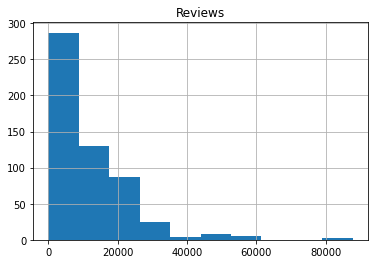

In [ ]:
df.hist("Reviews")

In [ ]:
df.sort_values('User Rating' , ascending=False)

,Name,Author,User Rating,Reviews,Price,Year,Genre
192,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2016,Non Fiction
477,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2014,Fiction
151,Hamilton: The Revolution,Lin-Manuel Miranda,4.9,5867,54,2016,Non Fiction
479,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2016,Fiction
480,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2017,Fiction
...,...,...,...,...,...,...,...
392,The Goldfinch: A Novel (Pulitzer Prize for Fic...,Donna Tartt,3.9,33844,20,2013,Fiction
106,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2012,Fiction
107,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2013,Fiction
132,Go Set a Watchman: A Novel,Harper Lee,3.6,14982,19,2015,Fiction


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a803b0c10>]],
      dtype=object)

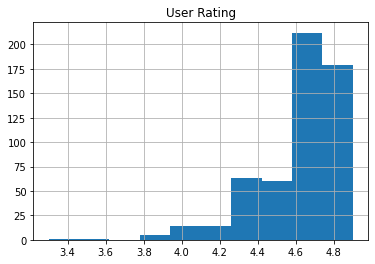

In [ ]:
df.hist('User Rating')

In [ ]:
df.sort_values('Price', ascending= False)

,Name,Author,User Rating,Reviews,Price,Year,Genre
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013,Non Fiction
70,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2014,Non Fiction
473,The Twilight Saga Collection,Stephenie Meyer,4.7,3801,82,2009,Fiction
151,Hamilton: The Revolution,Lin-Manuel Miranda,4.9,5867,54,2016,Non Fiction
346,The Book of Basketball: The NBA According to T...,Bill Simmons,4.7,858,53,2009,Non Fiction
...,...,...,...,...,...,...,...
116,Frozen (Little Golden Book),RH Disney,4.7,3642,0,2014,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
505,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2013,Fiction
508,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2016,Fiction


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a7fe8acd0>]],
      dtype=object)

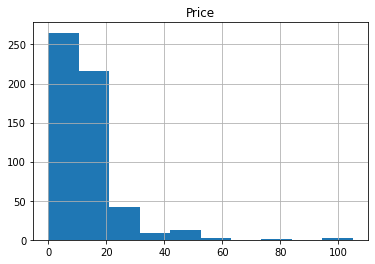

In [ ]:
df.hist('Price')

In [ ]:
df.sort_values('Year')

,Name,Author,User Rating,Reviews,Price,Year,Genre
177,"I, Alex Cross",James Patterson,4.6,1320,7,2009,Fiction
131,Glenn Beck's Common Sense: The Case Against an...,Glenn Beck,4.6,1365,11,2009,Non Fiction
417,The Last Lecture,Randy Pausch,4.7,4028,9,2009,Non Fiction
241,New Moon (The Twilight Saga),Stephenie Meyer,4.6,5680,10,2009,Fiction
72,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,4.8,3837,15,2009,Fiction
...,...,...,...,...,...,...,...
145,Goodnight Moon,Margaret Wise Brown,4.8,8837,5,2019,Fiction
239,"National Geographic Kids Why?: Over 1,111 Answ...",Crispin Boyer,4.8,5347,16,2019,Non Fiction
74,Difficult Riddles For Smart Kids: 300 Difficul...,M Prefontaine,4.6,7955,5,2019,Non Fiction
252,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2019,Fiction


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a7fe14f90>]],
      dtype=object)

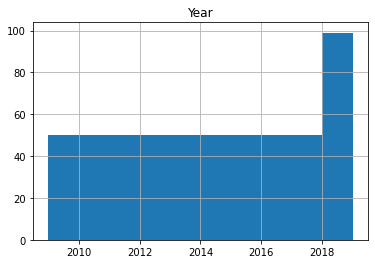

In [ ]:
df.hist('Year')

In [ ]:
y=df[df["Year"]== 2019]
y.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction
41,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2019,Fiction
44,Can't Hurt Me: Master Your Mind and Defy the Odds,David Goggins,4.8,16244,18,2019,Non Fiction
74,Difficult Riddles For Smart Kids: 300 Difficul...,M Prefontaine,4.6,7955,5,2019,Non Fiction


In [ ]:
y.count()

Name           49
Author         49
User Rating    49
Reviews        49
Price          49
Year           49
Genre          49
dtype: int64

In [ ]:
len(df.Name.value_counts())

351

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a7ff38050>,
      dtype=object)

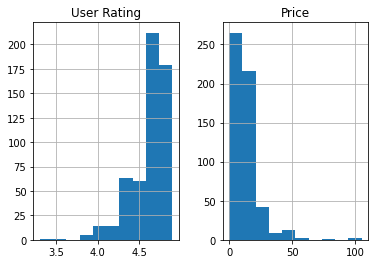

In [ ]:
df[["User Rating", "Price"]].hist()

In [ ]:
x=df[df["User Rating"]==4.9]
x.head()


,Name,Author,User Rating,Reviews,Price,Year,Genre
40,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2017,Fiction
41,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2019,Fiction
81,Dog Man and Cat Kid: From the Creator of Capta...,Dav Pilkey,4.9,5062,6,2018,Fiction
82,Dog Man: A Tale of Two Kitties: From the Creat...,Dav Pilkey,4.9,4786,8,2017,Fiction
83,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2018,Fiction


In [ ]:
len(x)

52

In [ ]:
#popularity
popularity = [ 0,0,0,0]
for i in df['User Rating']:
  if i >= 4.8:
    popularity[0] += 1
  elif i >= 4.5:
    popularity [1] +=1
  elif i >= 4.0:
    popularity [2] +=1
  else:
    popularity [3] +=1

print(popularity)

[179, 272, 91, 7]


In [ ]:
pop = ['Extremely Popular(4.8 , 4.9)' , 'Very Popular(4.5, 4.7)' , 'Fairly Popular(4.0 , 4.4)' , 'Popular(-3.9)']
print(pop)

['Extremely Popular(4.8 , 4.9)', 'Very Popular(4.5, 4.7)', 'Fairly Popular(4.0 , 4.4)', 'Popular(-3.9)']


In [ ]:
fig = go.Figure([go.Bar(x=pop, y= popularity)])
fig.show()


In [ ]:
df1 = df.groupby('Author').count().reset_index().sort_values('Name' , ascending=False).head(10)
print(df1)

                                 Author  Name  User Rating  Reviews  Price  \
120                         Jeff Kinney    12           12       12     12   
92                         Gary Chapman    11           11       11     11   
226                     Suzanne Collins    11           11       11     11   
197                        Rick Riordan    11           11       11     11   
11   American Psychological Association    10           10       10     10   
90                               Gallup     9            9        9      9   
73                            Dr. Seuss     9            9        9      9   
199                         Rob Elliott     8            8        8      8   
83                           Eric Carle     7            7        7      7   
27                        Bill O'Reilly     7            7        7      7   

     Year  Genre  
120    12     12  
92     11     11  
226    11     11  
197    11     11  
11     10     10  
90      9      9  
73      

In [ ]:
df2 = df1.rename(columns={"Name":"Number Of Times"}, inplace=True)

In [ ]:
df2 = df1[['Author', 'Number Of Times']]
print(df2)

                                 Author  Number Of Times
120                         Jeff Kinney               12
92                         Gary Chapman               11
226                     Suzanne Collins               11
197                        Rick Riordan               11
11   American Psychological Association               10
90                               Gallup                9
73                            Dr. Seuss                9
199                         Rob Elliott                8
83                           Eric Carle                7
27                        Bill O'Reilly                7


In [ ]:
Best_Authors = df2

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a7fcb1910>]],
      dtype=object)

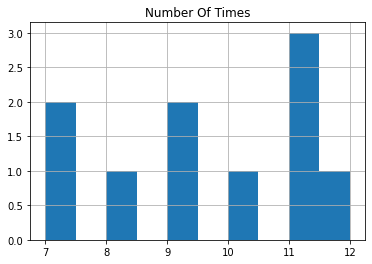

In [ ]:
Best_Authors.hist()

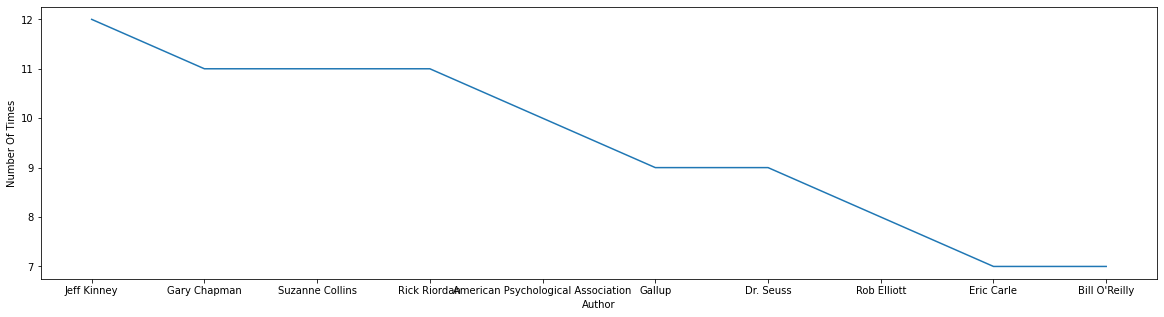

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 20,5
sns.lineplot(data=Best_Authors, x= 'Author' , y='Number Of Times')


In [ ]:
popularity = [0,0,0,0]
for i in df["User Rating"]:
    if i >= 4.8:
        popularity[0] += 1
    elif i >= 4.5:
        popularity[1] += 1
    elif i >= 4.0:
        popularity[2] += 1
    else:
        popularity[3] += 1

In [ ]:
x = ['Extremely Popular(4.8, 4.9)','Very Popular(4.4 - 4.7)','Fairly Popular(4.0 - 4.3)','Popular (- 3.9)']
fig = go.Figure([go.Bar(x=x, y=popularity)])
fig.update_layout(title_text='Popularity of Books')
fig.show()

In [ ]:
Fiction = df[df["Genre"]=='Fiction']
Fiction.head(10)


,Name,Author,User Rating,Reviews,Price,Year,Genre
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction
10,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2017,Fiction
13,A Wrinkle in Time (Time Quintet),Madeleine L'Engle,4.5,5153,5,2018,Fiction
20,All the Light We Cannot See,Anthony Doerr,4.6,36348,14,2014,Fiction
21,All the Light We Cannot See,Anthony Doerr,4.6,36348,14,2015,Fiction


In [ ]:
Fiction.count()

Name           240
Author         240
User Rating    240
Reviews        240
Price          240
Year           240
Genre          240
dtype: int64

In [ ]:
Fiction.sort_values('User Rating', ascending=False)

,Name,Author,User Rating,Reviews,Price,Year,Genre
288,Rush Revere and the Brave Pilgrims: Time-Trave...,Rush Limbaugh,4.9,7150,12,2013,Fiction
249,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2016,Fiction
247,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2014,Fiction
246,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2013,Fiction
245,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2012,Fiction
...,...,...,...,...,...,...,...
393,The Goldfinch: A Novel (Pulitzer Prize for Fic...,Donna Tartt,3.9,33844,20,2014,Fiction
107,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2013,Fiction
106,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2012,Fiction
132,Go Set a Watchman: A Novel,Harper Lee,3.6,14982,19,2015,Fiction


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a7fe99c10>]],
      dtype=object)

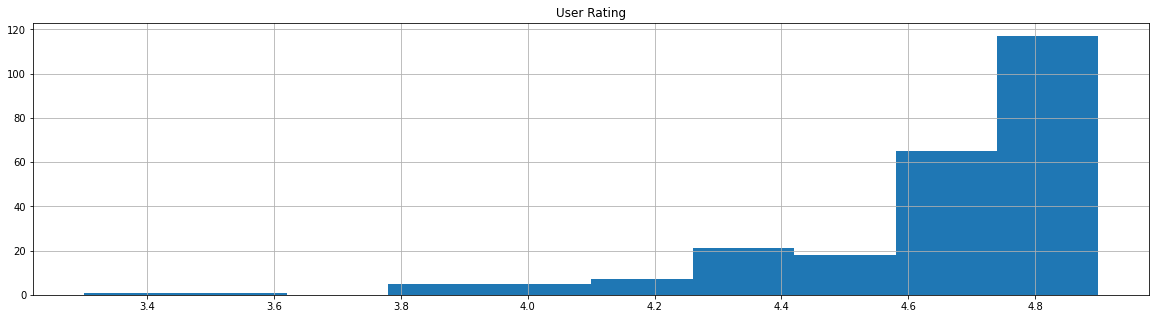

In [ ]:
Fiction.hist('User Rating')

In [ ]:
Non_Fiction = df[df["Genre"]=='Non Fiction']
Non_Fiction.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
11,A Patriot's History of the United States: From...,Larry Schweikart,4.6,460,2,2010,Non Fiction
12,A Stolen Life: A Memoir,Jaycee Dugard,4.6,4149,32,2011,Non Fiction
14,"Act Like a Lady, Think Like a Man: What Men Re...",Steve Harvey,4.6,5013,17,2009,Non Fiction
15,Adult Coloring Book Designs: Stress Relief Col...,Adult Coloring Book Designs,4.5,2313,4,2016,Non Fiction
16,Adult Coloring Book: Stress Relieving Animal D...,Blue Star Coloring,4.6,2925,6,2015,Non Fiction
17,Adult Coloring Book: Stress Relieving Patterns,Blue Star Coloring,4.4,2951,6,2015,Non Fiction


In [ ]:
Non_Fiction.count()

Name           309
Author         309
User Rating    309
Reviews        309
Price          309
Year           309
Genre          309
dtype: int64

In [ ]:
Non_Fiction.sort_values('User Rating', ascending=False)

,Name,Author,User Rating,Reviews,Price,Year,Genre
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction
189,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2013,Non Fiction
174,Humans of New York : Stories,Brandon Stanton,4.9,2812,17,2015,Non Fiction
188,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2012,Non Fiction
151,Hamilton: The Revolution,Lin-Manuel Miranda,4.9,5867,54,2016,Non Fiction
...,...,...,...,...,...,...,...
311,StrengthsFinder 2.0,Gallup,4.0,5069,17,2016,Non Fiction
308,StrengthsFinder 2.0,Gallup,4.0,5069,17,2013,Non Fiction
310,StrengthsFinder 2.0,Gallup,4.0,5069,17,2015,Non Fiction
309,StrengthsFinder 2.0,Gallup,4.0,5069,17,2014,Non Fiction


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a7f8764d0>]],
      dtype=object)

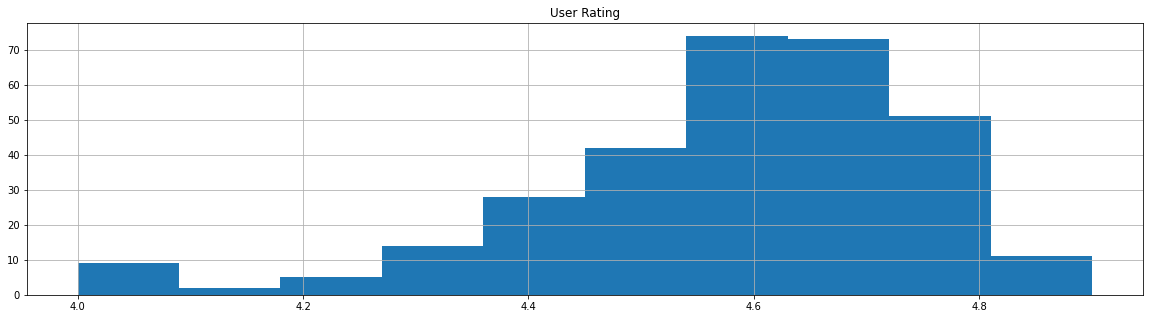

In [ ]:
Non_Fiction.hist('User Rating')

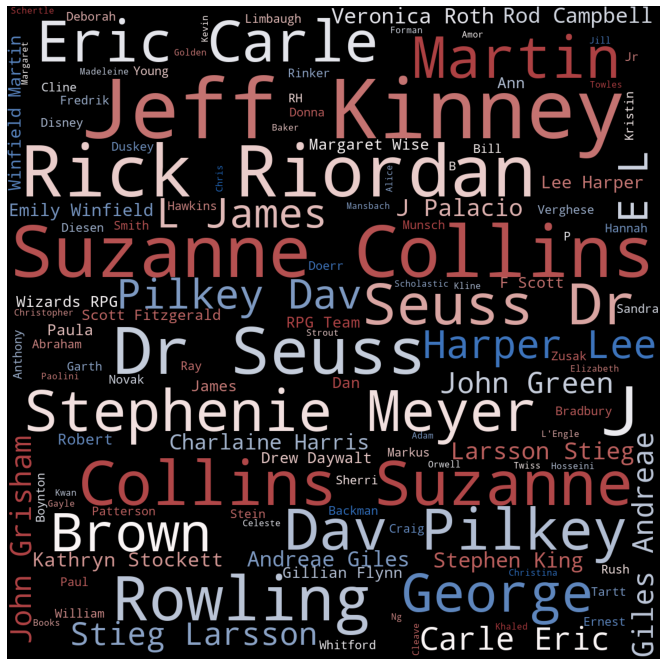

In [ ]:
from wordcloud import WordCloud

text=' '.join(Fiction['Author'])

plt.rcParams['figure.figsize']=(12,12)
wordcloud=WordCloud(background_color='black', colormap='vlag', 
                    width=1200, height=1200, max_words=121).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

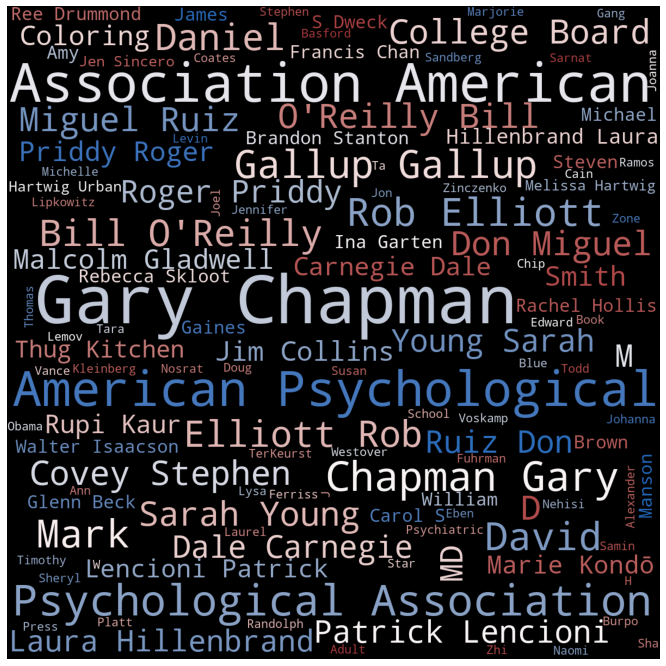

In [ ]:
from wordcloud import WordCloud

text=' '.join(Non_Fiction['Author'])

plt.rcParams['figure.figsize']=(12,12)
wordcloud=WordCloud(background_color='black', colormap='vlag', 
                    width=1200, height=1200, max_words=121).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
fig = go.Figure(data=[go.Table(
    header=dict(values=['Book Title','Author']),
    cells=dict(values=[df[df["User Rating"] == 4.9]["Name"],df[df["User Rating"] == 4.9]["Author"]],
               fill_color='lavender',
               align='left'))
])
fig.update_layout(title='Books Rated 4.9 (You can scroll the table)')
fig.show()